### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [41]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [42]:
data = pd.read_csv('data/coupons.csv')

In [43]:
pd.set_option('display.max_columns', None)

In [44]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [45]:
data.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


In [52]:
data.head(50)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.

In [35]:
# find null values for each column. Only significant one is car
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [51]:
#investigate columns with missing data
data.car.unique()
data.Bar.unique()
data.CoffeeHouse.unique()
data.CarryAway.unique()
data.RestaurantLessThan20.unique()
data.Restaurant20To50.unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [55]:
#combine directions into 1 column
data['direction']= np.where(data['direction_same'] == 1, "Same", "Different")

In [61]:
# Accepting Coupon
data['accepting_coupon']= np.where(data['Y'] == 1, "Yes", "No")

In [62]:
#drop car column since so many values missing
data = data.drop(['car','direction_same','direction_opp'] , axis = 1)
data

KeyError: "['car' 'direction_same' 'direction_opp'] not found in axis"

In [63]:
data.head(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,direction,accepting_coupon
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,Different,Yes
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,Different,No
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,1,Different,Yes
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,1,Different,Yes
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,1,Different,Yes
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,1,Different,Yes
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,1,Different,Yes
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No


<AxesSubplot:>

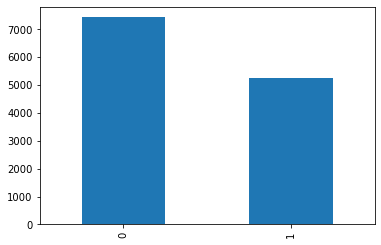

In [33]:
# plotting children vs. no children
data['has_children'].value_counts()
data['has_children'].value_counts().plot(kind = 'bar')

In [53]:
data['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

<AxesSubplot:>

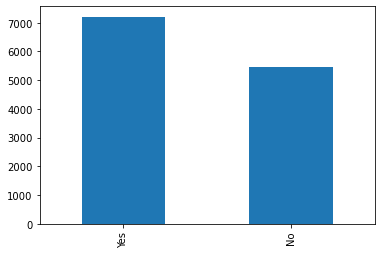

In [65]:
data['accepting_coupon'].value_counts()
data['accepting_coupon'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='accepting_coupon', ylabel='count'>

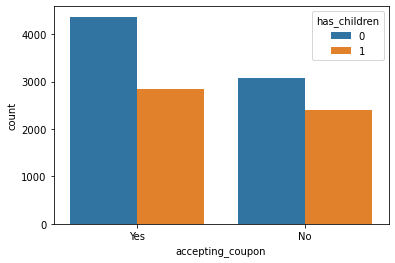

In [67]:
sns.countplot(x = 'accepting_coupon', hue = 'has_children',  data = data)

In [18]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#selected_rows = data[~data['car'].isnull()]
selected_rows = data[data['car'].isnull()]
selected_rows

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon? 



<AxesSubplot:>

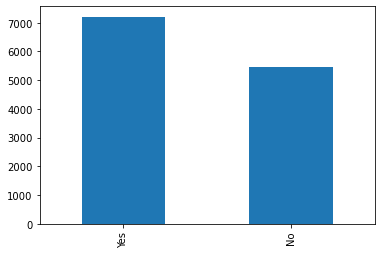

In [68]:
data['accepting_coupon'].value_counts()
data['accepting_coupon'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

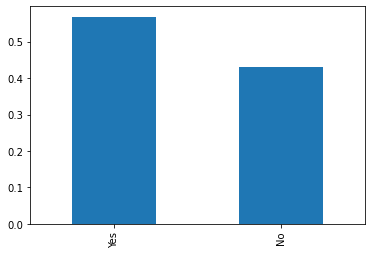

In [69]:
data['accepting_coupon'].value_counts()
data['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar')

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

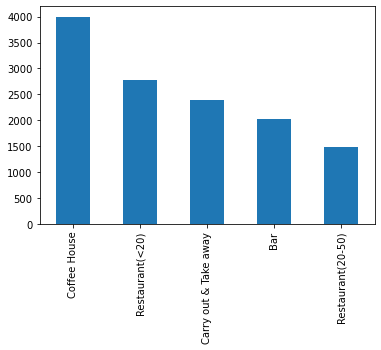

In [71]:
data['coupon'].value_counts()
data['coupon'].value_counts().plot(kind = 'bar')

6. Use a histogram to visualize the temperature column.

In [72]:
px.histogram(data, x = "temperature")

In [73]:
data['temperature'].unique()

array([55, 80, 30])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [76]:
bar_coupons = data.query("coupon == 'Bar'")
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,direction,accepting_coupon
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,Same,Yes
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,Different,No
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,Different,Yes
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,Same,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No


2. What proportion of bar coupons were accepted?


<AxesSubplot:>

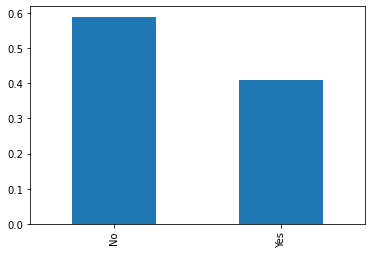

In [83]:
bar_coupons['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar')

In [78]:
#proportions accepting bar coupons
bar_coupons['accepting_coupon'].value_counts(normalize = True)

No     0.589985
Yes    0.410015
Name: accepting_coupon, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [134]:
bar_coupons.shape
bar_coupons.shape[0]
bar_coupons.count()

destination             2017
passanger               2017
weather                 2017
temperature             2017
time                    2017
coupon                  2017
expiration              2017
gender                  2017
age                     2017
maritalStatus           2017
has_children            2017
education               2017
occupation              2017
income                  2017
Bar                     1996
CoffeeHouse             1978
CarryAway               1993
RestaurantLessThan20    1994
Restaurant20To50        1981
toCoupon_GEQ5min        2017
toCoupon_GEQ15min       2017
toCoupon_GEQ25min       2017
Y                       2017
direction               2017
accepting_coupon        2017
bargoers                1996
dtype: int64

In [135]:
def calc_new_col(row):
    if row['Bar'] == 'never' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == 'less1' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == '1~3' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == '4~8' :
        return 'Greater than 3'
    elif row['Bar'] == 'gt8' :
        return 'Greater than 3'
        
data['bargoers'] = data.apply(calc_new_col, axis = 1)
bar_coupons['bargoers'] = data.apply(calc_new_col, axis = 1)
# data['bargoers'] = np.where((data['Bar'] == 'never' | data['Bar'] == 'less1' ), "Infrequent", "Frequent")
data.bargoers.value_counts()

/var/folders/kf/0f7t7jlj05d948lftjhjgf640000gn/T/ipykernel_60675/580204963.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Less than or Equal to 3    11152
Greater than 3              1425
Name: bargoers, dtype: int64

In [105]:
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,direction,accepting_coupon,bargoers
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No,Less than or Equal to 3
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,Same,Yes,Less than or Equal to 3
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,Different,No,Less than or Equal to 3
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,Different,Yes,Less than or Equal to 3
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,Same,Yes,Less than or Equal to 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No,Less than or Equal to 3
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No,Less than or Equal to 3
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No,Less than or Equal to 3
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No,Less than or Equal to 3


In [127]:
# Percentage of Bargoers accepting coupon
less3_accept = bar_coupons.query('bargoers == "Less than or Equal to 3" & accepting_coupon == "Yes"')
infrequent_rate = len(less3_accept) / len(bar_coupons.query('bargoers == "Less than or Equal to 3"'))
#less3_accept = len(infrequent_bar_rate.index)
#accept_total = len(bar_coupons.query('accepting_coupon == "Yes"'))
#accept_total
infrequent_rate

0.37061769616026713

In [129]:
# We see that 37% of infrequent bar goers accept the coupon vs 76% of frequent bar goers
more3_accept = bar_coupons.query('bargoers == "Greater than 3" & accepting_coupon == "Yes"')
frequent_rate = len(more3_accept) / len(bar_coupons.query('bargoers == "Greater than 3"'))
frequent_rate

0.7688442211055276

<AxesSubplot:xlabel='accepting_coupon', ylabel='count'>

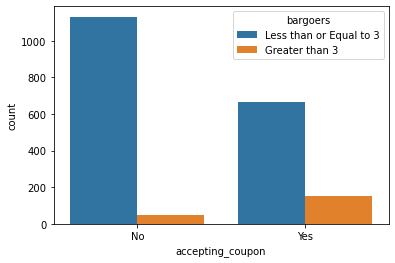

In [104]:
sns.countplot(x = 'accepting_coupon', hue = 'bargoers',  data = bar_coupons)

In [131]:
bar_coupons.shape

(2017, 26)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [157]:
#rename age values
def calc_new_col2(row):
    if row['age'] == 'below21' :
        return 'Under 21'
    elif row['age'] == '21' :
        return 'Age 21 to 25'
    elif row['age'] == '26' :
        return 'Age 26 to 30'
    elif row['age'] == '31' :
        return 'Age 31 to 35'
    elif row['age'] == '36' :
        return 'Age 36 to 40'
    elif row['age'] == '41' :
        return 'Age 41 to 45'
    elif row['age'] == '46' :
        return 'Age 46 to 50'
    elif row['age'] == '50plus' :
        return 'Over 50'
        
data['ages'] = data.apply(calc_new_col2, axis = 1)

In [158]:
#data.Bar.unique()
data.shape
#data.sample(50)
data.ages.unique()


array(['Age 21 to 25', 'Age 46 to 50', 'Age 26 to 30', 'Age 31 to 35',
       'Age 41 to 45', 'Over 50', 'Age 36 to 40', 'Under 21'],
      dtype=object)

In [160]:
#find drivers that go to bar more than once and over age of 25
data.age.unique()
data.Bar.unique()
bar_gt1_over25  = data.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['ages'] == 'Age 26 to 30') | (data['ages'] == 'Age 31 to 35') | \
                           (data['ages'] == 'Age 36 to 40') | (data['ages'] == 'Age 41 to 45') | \
                           (data['ages'] == 'Age 46 to 50') | (data['ages'] == 'Over 50'))]
bar_gt1_over25.shape[0]

2777

## Comparing the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others
We see there is a slight difference as those drivers that go to a bar more than once per month and are over 25 accept the coupon at 62% compared to 56% of overall drivers.

In [162]:
#overall acceptance rate
data['accepting_coupon'].value_counts(normalize = True)

Yes    0.568433
No     0.431567
Name: accepting_coupon, dtype: float64

In [163]:
# Acceptance rate for those drivers that go to bars more than once and are over 25
bar_gt1_over25['accepting_coupon'].value_counts(normalize = True)

Yes    0.621534
No     0.378466
Name: accepting_coupon, dtype: float64

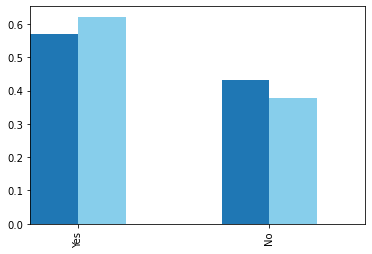

In [168]:
width = .25
data['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar', position = 1, width = width)
bar_gt1_over25['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar', color = 'skyblue', position = 0, width = width)
plt.show()

<AxesSubplot:>

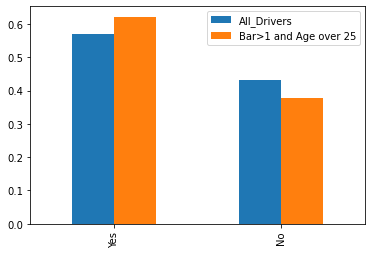

In [177]:
graph_df_ratio = data['accepting_coupon'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar_gt1_over25['accepting_coupon'].value_counts(normalize = True).rename('Bar>1 and Age over 25').to_frame())

graph_df_ratio.plot(kind = 'bar')

<AxesSubplot:>

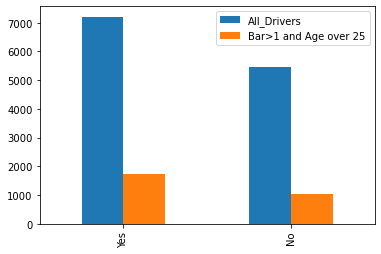

In [175]:
graph_df_count = data['accepting_coupon'].value_counts().rename('All_Drivers').to_frame() \
            .join(bar_gt1_over25['accepting_coupon'].value_counts().rename('Bar>1 and Age over 25').to_frame())

graph_df_count
graph_df_count.plot(kind = 'bar')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [179]:
data['passanger'].unique()
data['occupation'].unique()


array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [182]:
# find drivers who go to bars more than once a month and had passengers 
#that were not a kid and had occupations other than farming, fishing, or forestry.
occupations_notff = ['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       ]
bar1_nokid_occupationnotfff = data.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['passanger'] == 'Friend(s)') | (data['passanger'] == 'Partner')) & \
                            (data['occupation'] != 'Farming Fishing & Forestry')]

bar1_nokid_occupationnotfff
                            

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,direction,accepting_coupon,bargoers,ages
89,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
91,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
92,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
93,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12524,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Unmarried partner,0,High School Graduate,Food Preparation & Serving Related,$12500 - $24999,1~3,never,gt8,4~8,1~3,1,0,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,0,High School Graduate,Food Preparation & Serving Related,$12500 - $24999,1~3,never,gt8,4~8,1~3,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,0,High School Graduate,Food Preparation & Serving Related,$12500 - $24999,1~3,never,gt8,4~8,1~3,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
12527,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,21,Unmarried partner,0,High School Graduate,Food Preparation & Serving Related,$12500 - $24999,1~3,never,gt8,4~8,1~3,1,0,0,0,Different,No,Less than or Equal to 3,Age 21 to 25


In [183]:
# These drivers accept coupons at higher rate
bar1_nokid_occupationnotfff['accepting_coupon'].value_counts(normalize = True)

Yes    0.69024
No     0.30976
Name: accepting_coupon, dtype: float64

<AxesSubplot:>

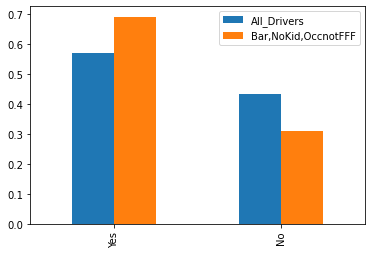

In [185]:
graph_df_ratio2 = data['accepting_coupon'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar1_nokid_occupationnotfff['accepting_coupon'].value_counts(normalize = True).rename('Bar,NoKid,OccnotFFF').to_frame())

graph_df_ratio2.plot(kind = 'bar')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [195]:
# Get the 3 filtered drivers
bar1_nokid_notwidow = data.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['passanger'] == 'Friend(s)') | (data['passanger'] == 'Partner')) & \
                            (data['maritalStatus'] != 'Widowed')]

bar1_under30 = data.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['ages'] == 'Age 26 to 30') | (data['ages'] == '21 to 25') | \
                           (data['ages'] == 'Under 21'))]

cheaprest4_incomeunder50 = data.loc[((data['RestaurantLessThan20'] == '4~8') | (data['Bar'] == 'gt8')) & \
                                     ((data['income'] == '$37500 - $49999' ) | (data['income'] == '$12500 - $24999') | \
                                      (data['income'] == 'Less than $12500'))]

data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

<AxesSubplot:>

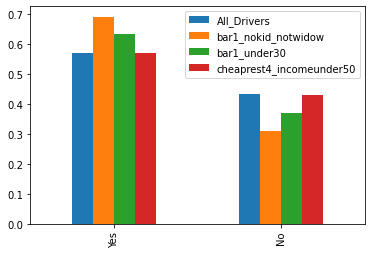

In [198]:
# create and plot one dataframe from info needed
graph_df_ratio3 = data['accepting_coupon'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar1_nokid_notwidow['accepting_coupon'].value_counts(normalize = True).rename('bar1_nokid_notwidow').to_frame()) \
            .join(bar1_under30['accepting_coupon'].value_counts(normalize = True).rename('bar1_under30').to_frame()) \
            .join(cheaprest4_incomeunder50['accepting_coupon'].value_counts(normalize = True).rename('cheaprest4_incomeunder50').to_frame())

graph_df_ratio3.plot(kind = 'bar')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on these observations it appears that drivers who frequent bars more than once per month are most likely to accept the coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  